# ML Pipeline Preparation
## 1. Imports

### Import libraries


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from scipy.stats import randint

import pickle


### Load dataset

In [2]:
# load dataset

filepath = "G:\My Drive\PhD_tinz\Dissertation\Drilling_case_study\Drilling_code\data\lost_circulation_data.csv"
df = pd.read_csv(filepath)

## 2. Descriptive Statistics

In [3]:
df.head()

,HoleSection,M.Depth,RateofPenetration,WeightonBit,Rotation,Torque,StandpipePressure,FlowIn,FlowOut,PumpStroke,MudWeight,FunnelViscosity,PlasticViscosity,YieldPoint,Gel Strength10sec,Gel Strength10min,Solid,LossesSeverity
0,17.5,823,4.08,30.8,139.0,4.3,1084,726.0,43.05,127.0,72.0,36,6,15,7,8,8,No-Loss
1,17.5,824,4.55,35.2,119.0,4.3,877,663.0,37.56,116.0,72.0,36,6,15,7,8,8,No-Loss
2,17.5,825,5.17,32.9,117.0,4.4,780,643.0,37.30,113.0,72.0,36,6,15,7,8,8,No-Loss
3,17.5,826,8.33,25.2,121.0,3.9,950,701.0,38.48,123.0,72.0,36,6,15,7,8,8,No-Loss
4,17.5,827,7.59,32.0,129.0,4.3,1214,788.0,40.54,138.0,72.0,36,6,15,7,8,8,No-Loss


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65376 entries, 0 to 65375
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HoleSection        65376 non-null  float64
 1   M.Depth            65376 non-null  int64  
 2   RateofPenetration  65376 non-null  float64
 3   WeightonBit        65376 non-null  float64
 4   Rotation           65376 non-null  float64
 5   Torque             65376 non-null  float64
 6   StandpipePressure  65376 non-null  int64  
 7   FlowIn             65376 non-null  float64
 8   FlowOut            65376 non-null  float64
 9   PumpStroke         65376 non-null  float64
 10  MudWeight          65376 non-null  float64
 11  FunnelViscosity    65376 non-null  int64  
 12  PlasticViscosity   65376 non-null  int64  
 13  YieldPoint         65376 non-null  int64  
 14  Gel Strength10sec  65376 non-null  int64  
 15  Gel Strength10min  65376 non-null  int64  
 16  Solid              653

In [5]:
df.describe()

,HoleSection,M.Depth,RateofPenetration,WeightonBit,Rotation,Torque,StandpipePressure,FlowIn,FlowOut,PumpStroke,MudWeight,FunnelViscosity,PlasticViscosity,YieldPoint,Gel Strength10sec,Gel Strength10min,Solid
count,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000
mean,11.605933,2046.342511,10.629847,15.726138,160.607665,3.284131,2047.039326,592.616437,59.894352,112.128859,79.279384,42.966196,14.033988,16.093719,4.357409,5.877294,14.344224
std,4.510259,1048.386746,13.726613,11.099158,48.623582,1.721905,594.367749,222.032552,15.558401,36.985504,10.946598,5.656413,6.725399,4.733618,2.269919,2.739437,6.042994
min,4.125000,14.000000,0.060000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,6.000000,66.000000,29.000000,3.000000,2.000000,1.000000,1.000000,4.000000
25%,8.500000,1172.000000,3.550000,7.500000,130.000000,2.370000,1661.000000,478.000000,49.500000,95.000000,75.000000,39.000000,10.000000,13.000000,3.000000,4.000000,11.000000
50%,8.500000,2098.000000,6.430000,12.700000,155.000000,3.315000,2137.000000,593.000000,57.800000,115.000000,77.000000,43.000000,13.000000,15.000000,4.000000,5.000000,13.000000
75%,17.500000,2905.000000,12.320000,21.200000,186.000000,4.278000,2542.000000,782.000000,71.500000,141.000000,80.000000,45.000000,16.000000,19.000000,5.000000,7.000000,16.000000
max,26.000000,4285.000000,616.010000,79.400000,457.000000,12.300000,3915.000000,1934.000000,100.080000,242.000000,127.000000,76.000000,48.000000,47.000000,26.000000,27.000000,65.000000


In [6]:
df["LossesSeverity"].value_counts()

No-Loss          49545
Seepage Loss     12880
Partial Loss      2647
Severe Loss        270
Complete Loss       34
Name: LossesSeverity, dtype: int64

In [7]:
# Seperate output and input variables
redun = ["LossesSeverity"]

X,y = df.drop(redun, axis=1), df["LossesSeverity"]
# le = LabelEncoder()
# y = le.fit_transform(y)

## 3. Data Visualizations

In [8]:
# Change fontsize for all notebook plots

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.style.use('ggplot') # use ggplot style

### Univariate Plots

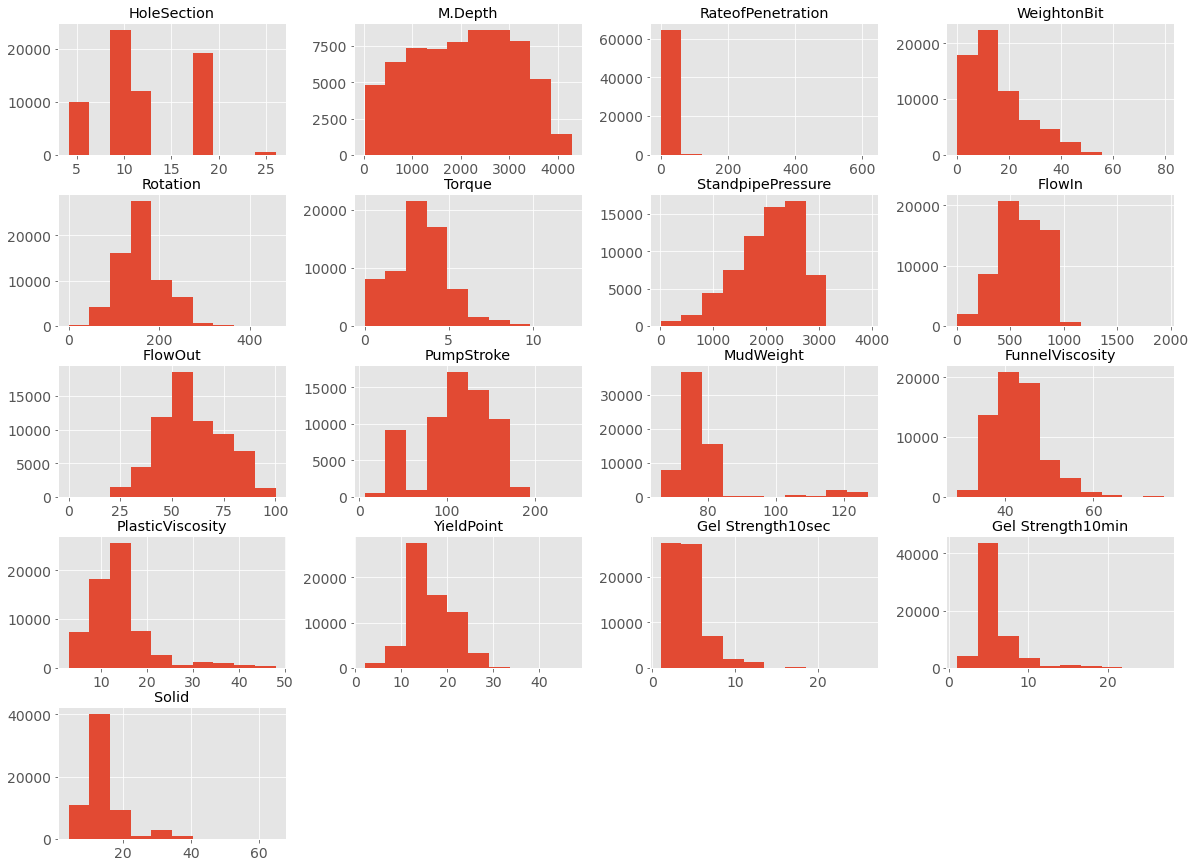

In [9]:
#histogram
X.hist(figsize=(20,15))
plt.show()

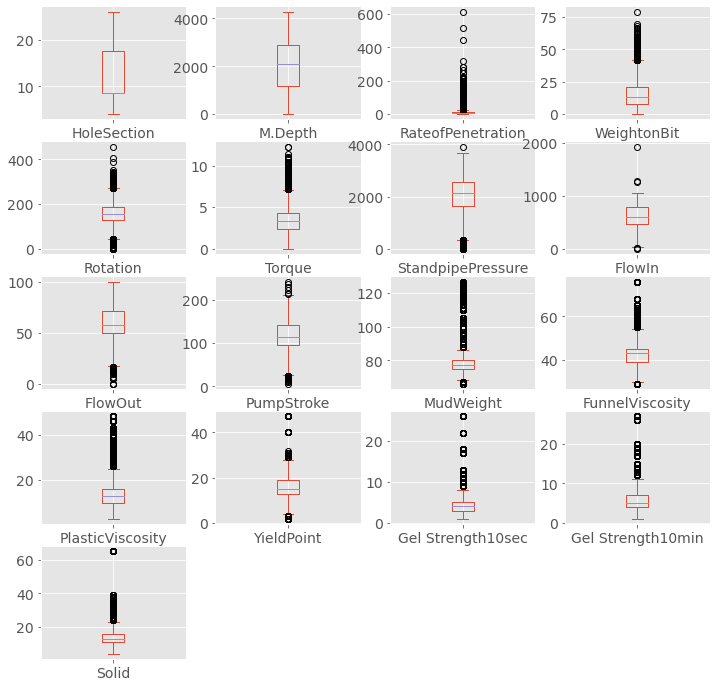

In [10]:
#box and whisker plots
X.plot(kind='box', subplots=True, layout = (5,4), sharex= False, sharey = False, figsize = (12,12))
plt.show()

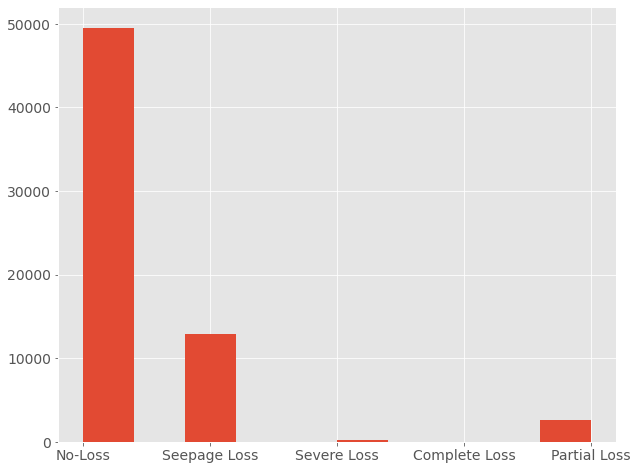

In [11]:
y.hist(figsize = (10,8));

The labels of the target variable are observed to be imbalanced

### Multivariate Plots

We observe multicollinearity between several features. This dataset will benefit from algorithms that tackle multicollinearity such as dimensionality reduction techniques 

In [12]:
# pd.plotting.scatter_matrix(df.drop('LossesSeverity', axis=1), figsize = [15,15], s=50);

### 2. Preprocessing

In [13]:
# check number of duplicates
df.duplicated().sum()

0

In [14]:
# # ordinal encode target variable
# label_encoder = LabelEncoder()
# label_encoder.fit(y.ravel())
# df["LossesSev_encoded"] = label_encoder.transform(y)


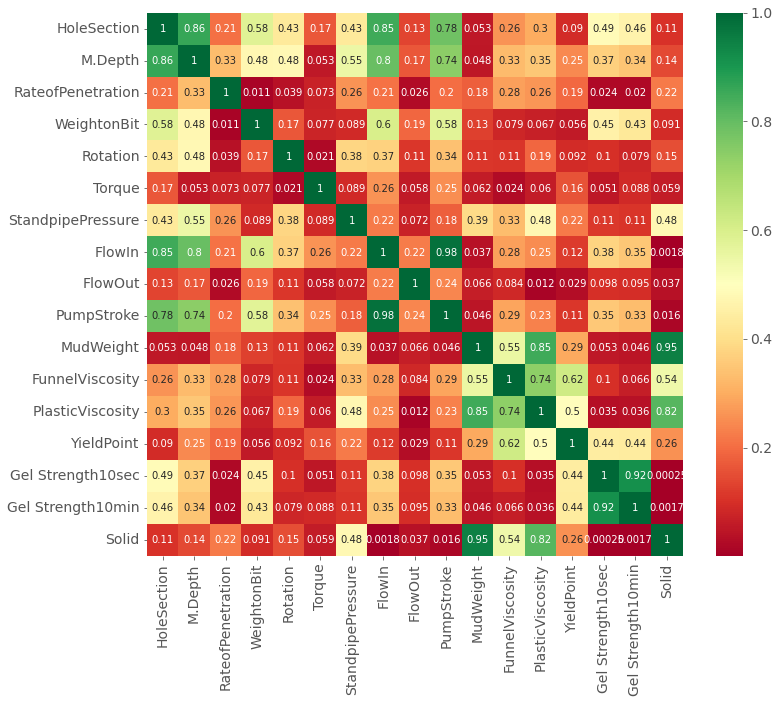

In [15]:
# Correlation Matrix
corr_matrix = df.corr().abs()
# corr_matrix.style.background_gradient()

plt.figure(figsize=(12,10)) 
p=sns.heatmap(corr_matrix, annot=True,cmap ='RdYlGn') 

#### Handle Correlation 

In [16]:
def find_correlation(df, thresh=0.9):
    """
    Given a numeric pd.DataFrame, this will find highly correlated features,
    and return a list of features to remove
    params:
    - df : pd.DataFrame
    - thresh : correlation threshold, will remove one of pairs of features with
               a correlation greater than this value
    """
    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)


    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

drop_col = find_correlation(X, thresh=0.7)
drop_col

['PumpStroke',
 'HoleSection',
 'Solid',
 'MudWeight',
 'FunnelViscosity',
 'Gel Strength10sec']

In [17]:
X.drop(drop_col, axis=1, inplace = True)

In [18]:
list(X.columns)

['M.Depth',
 'RateofPenetration',
 'WeightonBit',
 'Rotation',
 'Torque',
 'StandpipePressure',
 'FlowIn',
 'FlowOut',
 'PlasticViscosity',
 'YieldPoint',
 'Gel Strength10min']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65376 entries, 0 to 65375
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   M.Depth            65376 non-null  int64  
 1   RateofPenetration  65376 non-null  float64
 2   WeightonBit        65376 non-null  float64
 3   Rotation           65376 non-null  float64
 4   Torque             65376 non-null  float64
 5   StandpipePressure  65376 non-null  int64  
 6   FlowIn             65376 non-null  float64
 7   FlowOut            65376 non-null  float64
 8   PlasticViscosity   65376 non-null  int64  
 9   YieldPoint         65376 non-null  int64  
 10  Gel Strength10min  65376 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 5.5 MB


In [20]:
# # ANOVA feature selection for numeric input and categorical output

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=10)
# # apply feature selection
# X_selected = fs.fit_transform(X, y)
# print(C.shape)

In [21]:
# # Correlation Matrix
# corr_matrix = df.corr().abs()
# # corr_matrix.style.background_gradient()

# plt.figure(figsize=(12,10)) 
# p=sns.heatmap(corr_matrix, annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [22]:
# check number of duplicates
X.duplicated().sum()

0

In [23]:
df.drop_duplicates(inplace= True)

In [24]:
# check number of duplicates
df.duplicated().sum()

0

In [25]:
X.head()

,M.Depth,RateofPenetration,WeightonBit,Rotation,Torque,StandpipePressure,FlowIn,FlowOut,PlasticViscosity,YieldPoint,Gel Strength10min
0,823,4.08,30.8,139.0,4.3,1084,726.0,43.05,6,15,8
1,824,4.55,35.2,119.0,4.3,877,663.0,37.56,6,15,8
2,825,5.17,32.9,117.0,4.4,780,643.0,37.30,6,15,8
3,826,8.33,25.2,121.0,3.9,950,701.0,38.48,6,15,8
4,827,7.59,32.0,129.0,4.3,1214,788.0,40.54,6,15,8


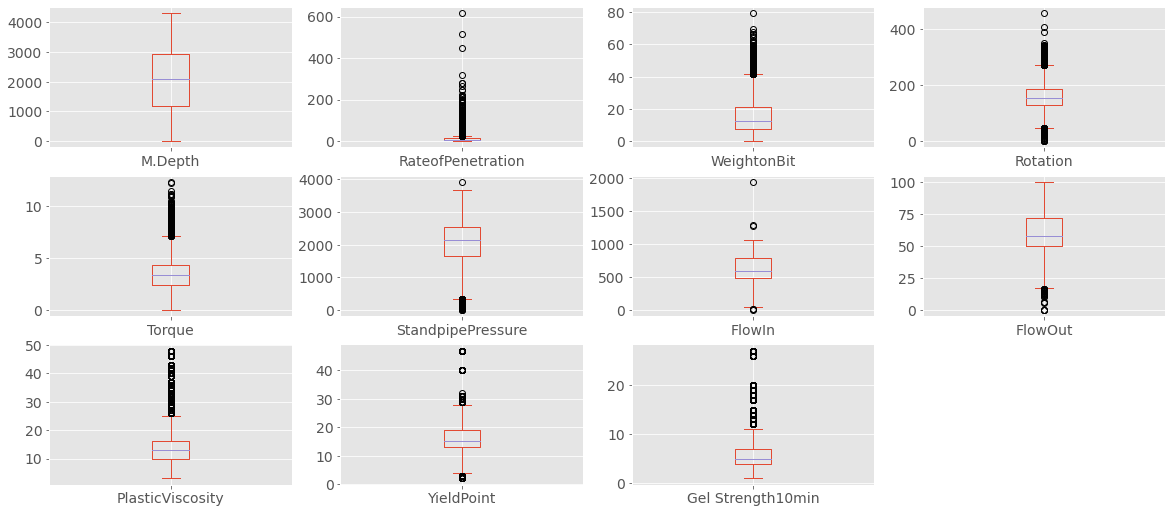

In [26]:
#box and whisker plots
X.plot(kind='box', subplots=True, layout = (5,4), sharex= False, sharey = False, figsize = (20,15))
plt.show()

#### Handle Outliers

In [27]:
# Outliers
for col in list(X.columns):
    Q1=X[col].quantile(0.25)
    Q3=X[col].quantile(0.75)
    IQR=Q3-Q1
    max_val = Q3+1.5*IQR
    min_val = Q1-1.5*IQR
    X[col] = np.where(X[col] >= max_val, max_val, X[col])
    X[col] = np.where(X[col] <= min_val, max_val, X[col])






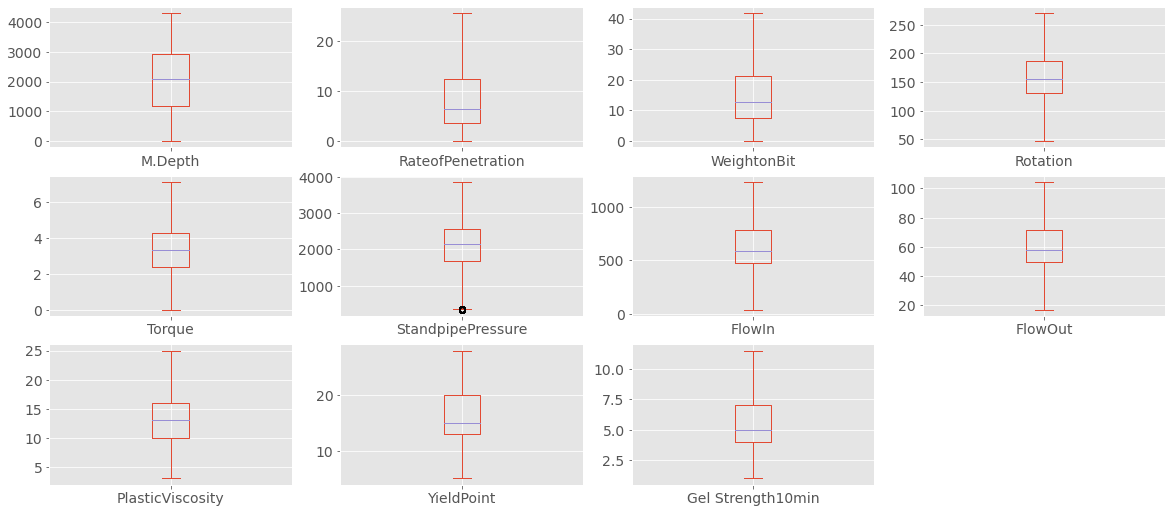

In [28]:
#box and whisker plots
X.plot(kind='box', subplots=True, layout = (5,4), sharex= False, sharey = False, figsize = (20,15))
plt.show()

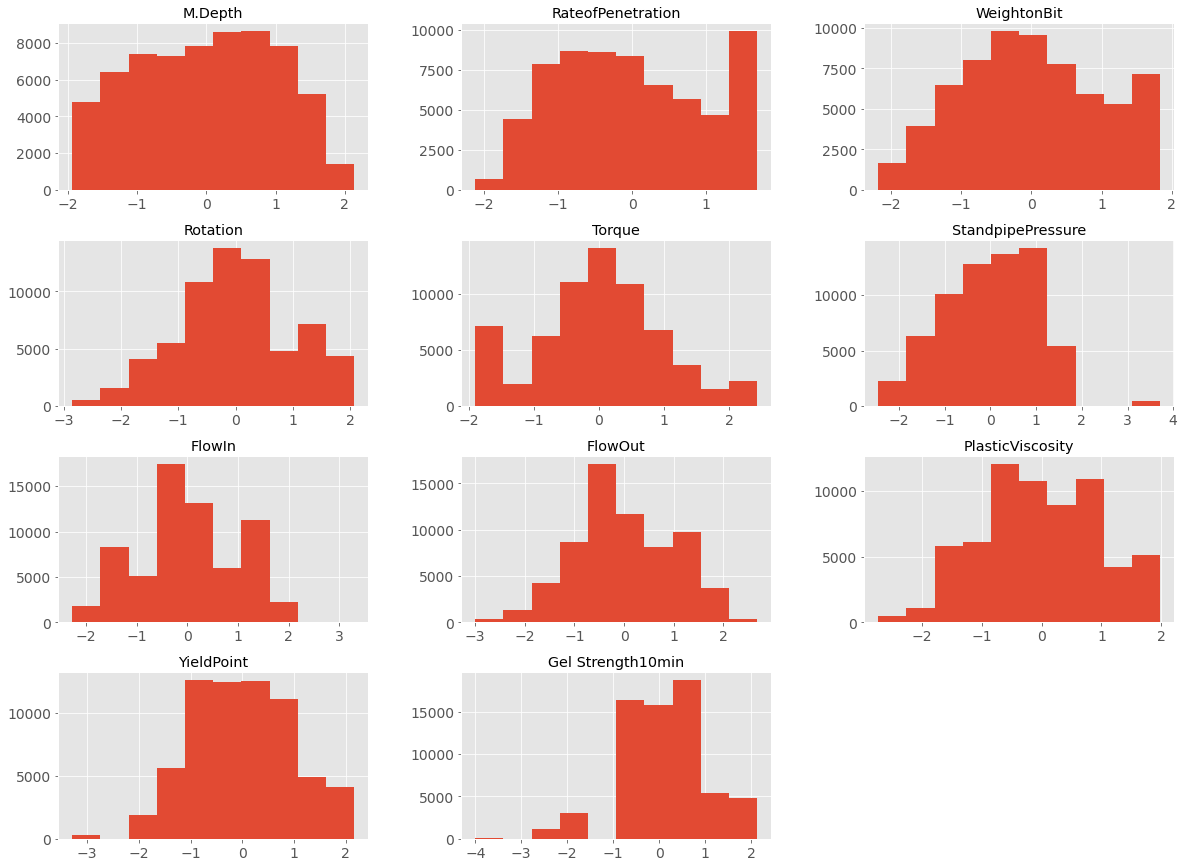

In [29]:

# retrieve just the numeric input values
data = X.values
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)
# convert the array back to a dataframe
colnames = list(X.columns)
dataset = pd.DataFrame(data, columns = colnames)
# histograms of the variables
# fig = dataset.hist(xlabelsize=4, ylabelsize=4, figsize=(20,15) )
# [x.title.set_size(4) for x in fig.ravel()]
# # show the plot
dataset.hist(figsize=(20,15) )
plt.show()

In [30]:
X.describe()

,M.Depth,RateofPenetration,WeightonBit,Rotation,Torque,StandpipePressure,FlowIn,FlowOut,PlasticViscosity,YieldPoint,Gel Strength10min
count,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000,65376.000000
mean,2046.342511,9.065718,15.590446,161.153543,3.262775,2070.496230,592.661331,59.937161,13.461851,16.303567,5.697534
std,1048.386746,7.333858,10.729342,47.461851,1.663857,593.143778,221.989425,15.552313,4.985729,4.575421,2.059559
min,14.000000,0.060000,0.000000,47.000000,0.000000,340.000000,37.000000,17.000000,3.000000,5.000000,1.000000
25%,1172.000000,3.550000,7.500000,130.000000,2.370000,1674.000000,478.000000,49.517500,10.000000,13.000000,4.000000
50%,2098.000000,6.430000,12.700000,156.000000,3.315000,2147.000000,593.000000,57.810000,13.000000,15.000000,5.000000
75%,2905.000000,12.320000,21.200000,187.000000,4.278000,2552.000000,782.000000,71.572500,16.000000,20.000000,7.000000
max,4285.000000,25.475000,41.750000,270.000000,7.140000,3863.500000,1238.000000,104.500000,25.000000,28.000000,11.500000


## 3. Split Dataset into Training and test subsets

In [31]:
# # Seperate output and input variables
# redun = ["LossesSeverity"]

# X,y = df.drop(redun, axis=1), df["LossesSeverity"]
# # le = LabelEncoder()
# # y = le.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [33]:
# # ordinal encode target variable
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train.ravel())
# y_train = label_encoder.transform(y_train)
# y_test = label_encoder.transform(y_test)

In [34]:
X_train.describe()

,M.Depth,RateofPenetration,WeightonBit,Rotation,Torque,StandpipePressure,FlowIn,FlowOut,PlasticViscosity,YieldPoint,Gel Strength10min
count,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000,52300.000000
mean,2047.718126,9.062720,15.590120,161.124264,3.261754,2071.653786,592.916734,59.903062,13.456329,16.300191,5.698040
std,1050.623594,7.334329,10.726839,47.484772,1.666505,592.421513,222.326596,15.576145,4.979257,4.581457,2.060369
min,14.000000,0.060000,0.000000,47.000000,0.000000,340.000000,37.000000,17.100000,3.000000,5.000000,1.000000
25%,1171.000000,3.550000,7.500000,130.000000,2.370000,1676.000000,478.000000,49.500000,10.000000,13.000000,4.000000
50%,2100.500000,6.420000,12.700000,156.000000,3.320000,2147.000000,594.000000,57.780000,13.000000,15.000000,5.000000
75%,2911.000000,12.350000,21.200000,187.000000,4.275000,2553.000000,785.000000,71.542500,16.000000,20.000000,7.000000
max,4285.000000,25.475000,41.750000,270.000000,7.140000,3863.500000,1238.000000,104.500000,25.000000,28.000000,11.500000


In [35]:
X_test.describe()

,M.Depth,RateofPenetration,WeightonBit,Rotation,Torque,StandpipePressure,FlowIn,FlowOut,PlasticViscosity,YieldPoint,Gel Strength10min
count,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000
mean,2040.840471,9.077710,15.591746,161.270649,3.266859,2065.866358,591.639798,60.073545,13.483940,16.317069,5.695511
std,1039.413625,7.332244,10.739755,47.371695,1.653281,596.024126,220.641197,15.456468,5.011662,4.551347,2.056393
min,14.000000,0.130000,0.000000,47.000000,0.000000,340.000000,82.000000,17.000000,3.000000,5.000000,1.000000
25%,1174.000000,3.547500,7.500000,131.000000,2.370000,1668.000000,478.000000,49.800000,10.000000,13.000000,4.000000
50%,2091.000000,6.470000,12.600000,156.000000,3.300000,2147.500000,592.000000,58.000000,13.000000,16.000000,5.000000
75%,2883.000000,12.240000,21.200000,188.000000,4.280000,2545.000000,775.250000,71.680000,16.000000,20.000000,7.000000
max,4276.000000,25.475000,41.750000,270.000000,7.140000,3863.500000,1238.000000,104.500000,25.000000,28.000000,11.500000


## 3. Compare ML Techniques


### Utilities

In [36]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'f1_weighted'
# cv = RepeatedKFold(n_splits=num_folds, random_state=seed)
cv = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=3, random_state=seed)


In [37]:
# Build a ML pipeline that includes data transformations steps and modeling
def build_pipeline(clf):
    pipeline = Pipeline([
        ('StandardScaler', MinMaxScaler(feature_range=(1, 2))),
        ('BoxScaler', PowerTransformer(method='box-cox')),
        ('model', clf)
    ])
    return pipeline

In [38]:
def parameter_search(pipeline, parameters):


    # create grid search object
    # model = GridSearchCV(pipeline, param_grid=parameters)
    model = RandomizedSearchCV(estimator= pipeline, param_distributions=parameters,cv=cv,
                            return_train_score=True, random_state = seed, scoring = scoring,
                            verbose =2, n_jobs=-1,)
    

    model.fit(X_train, y_train.to_numpy().ravel())

    print("\nBest Parameters:", model.best_params_)

    return model


In [39]:
def evaluate_model(model, X_test, y_test, figsize =(8,8)):
     # predict on test data
    y_pred = model.predict(X_test)
    # label = le.inverse_transform(y_pred)
    labels = y_test.unique()
    cnf_matrix = confusion_matrix(y_test, y_pred, labels = labels)
       
    print(
        f"Classification report for predicting:\n"
        f"{classification_report(y_test, y_pred, zero_division = 0)}\n"
    )
    fig, ax = plt.subplots(figsize =figsize)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    
    plt.xlabel('Predicted Label', fontsize=16)
    plt.ylabel('True Label', fontsize=16)

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    ## Display the visualization of the Confusion Matrix.
    plt.show()




In [40]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(12,12)):
    try:
        y_score = clf.predict_proba(X_test)
    except:
        y_score = clf.decision_function(X_test)

    # structures
    fpr = {}
    tpr = {}
    roc_auc = {}

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    
    class_type = np.unique(y_test.values)
    for i, val in enumerate(class_type):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {round(roc_auc[i],3)}) for label {val}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [41]:
# save the model to disk
def save_model(model, filename):    
    pickle.dump(model, open(filename, 'wb'))

In [42]:
# Open the file in binary mode
def load_model(filename):
    model =  pickle.load(open(filename, 'rb')) 
    return model

In [43]:
# from imblearn.pipeline import Pipeline as imb_pipeline
# from imblearn.over_sampling import SMOTE

# # load the dataset
# def load_dataset(full_path):
# 	# load the dataset as a numpy array
# 	df = pd.read_csv(full_path)
# 	# Seperate output and input variables
# 	target = "LossesSeverity"
# 	X,y = df.drop(target, axis=1), df[target]

# 	# label encode the target variable
# 	# y = LabelEncoder().fit_transform(y)
# 	return X, y

# def split_data(X,y, test_size):
# 	# Split into training and test sets
# 	X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,random_state=42)
# 	return X_train, X_test, y_train, y_test

# # define models to test
# def get_models():
# 	models, names = [],[]
# 	# LR
# 	models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
# 	names.append('LR')
# 	# LDA
# 	# models.append(LinearDiscriminantAnalysis())
# 	# names.append('LDA')
# 	# # SVM
# 	# models.append(SVC())
# 	# names.append('SVM')
# 	# # KNN
# 	# models.append(KNeighborsClassifier(n_neighbors=3))
# 	# names.append('KNN')
# 	# # GP
# 	# models.append(GaussianProcessClassifier())
# 	# names.append('GP')
# 	# # CART
# 	# models.append(DecisionTreeClassifier())
# 	# names.append('CART')
# 	return models, names


# # evaluate a model
# def cross_eval_model(X, y, model):
# 	# define evaluation procedure
# 	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# 	# evaluate model
# 	scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
# 	return scores

# # define the location of the dataset
# full_path = filepath
# X, y = load_dataset(full_path)
# X_train, X_test, y_train, y_test = split_data(X,y, 0.2)


# models, names = get_models()
# results = []

# for i in range(len(models)):
#     # kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_ tate=1)
# 	data_trans = Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox'))])
# 	X_train = data_trans.fit_transform(X_train.values)

# 	# create pipeline
# 	steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
# 	pipeline = imb_pipeline(steps=steps)

# 	scores = cross_eval_model(X_train, y_train, pipeline)
# 	results.append(scores)
# 	# summarize performance
# 	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# # plot the results
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()


### Run comparative experiments

In [102]:
pipelines = []
pipelines.append(('LDA', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('LR', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')),('LR', LogisticRegression(solver= 'sag'))])))
pipelines.append(('SVM', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('SVM', SVC())])))
pipelines.append(('CART', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('CART', DecisionTreeClassifier())])))
pipelines.append(('KNN', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('KNN', KNeighborsClassifier())])))
pipelines.append(('NB', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('NB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train.to_numpy().ravel(), cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.754485 (0.005675)
LR: 0.760085 (0.005740)
SVM: 0.946867 (0.002616)
CART: 0.990459 (0.001518)
KNN: 0.983241 (0.001607)
NB: 0.692105 (0.005212)


The non-linear models (SVM, CART and KNN) excel on these imbalanced dataset prediction

In [61]:
# LDA: 0.780036 (0.005677)
# LR: 0.790544 (0.005870)
# SVM: 0.962068 (0.002626)
# CART: 0.994011 (0.001029)
# KNN: 0.987568 (0.001282)
# NB: 0.693937 (0.005413)

In [109]:
for i in range(len(results)):
    print(results[i].mean(), results[i].std())

0.7544850655133712 0.005675364817626867
0.7600854883117913 0.005739853985882654
0.9468670972995852 0.002615913656537302
0.9904592235554797 0.0015180891931798818
0.9832405870700833 0.0016071483012275337
0.6921046147436434 0.005211983603455797


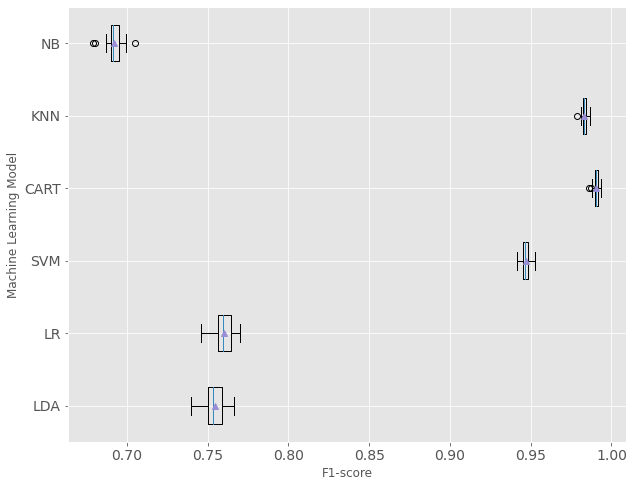

In [106]:
# # Compare Algorithms

fig = plt.figure(figsize=(10,8))
# fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert= False, showmeans=True)
ax.set_yticklabels(names)
ax.set_xlabel('F1-score')
ax.set_ylabel('Machine Learning Model')

plt.show()

A tight distribution is observed across all models and most especially with the KNN and CART suggesting low variance. The KNN and CART models have the highest accuracies. The parameters for these two models will be tuned to see if more accurate models can be obtained.

In [110]:
CART_single = DecisionTreeClassifier(random_state=42)

CART_pipeline = build_pipeline(CART_single)
CART_pipeline.fit(X_train, y_train.to_numpy().ravel())



Pipeline(steps=[('StandardScaler', MinMaxScaler(feature_range=(1, 2))),
                ('BoxScaler', PowerTransformer(method='box-cox')),
                ('model', DecisionTreeClassifier(random_state=42))])

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       1.00      1.00      1.00        26
      No-Loss       1.00      1.00      1.00     39685
 Partial Loss       1.00      1.00      1.00      2075
 Seepage Loss       1.00      1.00      1.00     10314
  Severe Loss       1.00      1.00      1.00       200

     accuracy                           1.00     52300
    macro avg       1.00      1.00      1.00     52300
 weighted avg       1.00      1.00      1.00     52300




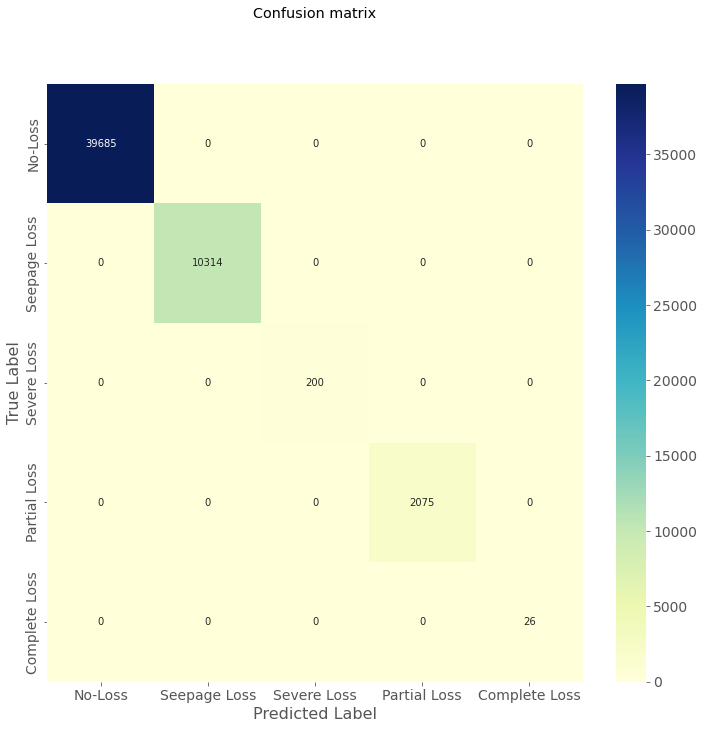

In [169]:
evaluate_model(CART_pipeline, X_train, y_train, figsize =(12,11))

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       0.70      0.88      0.78         8
      No-Loss       1.00      0.99      1.00      9860
 Partial Loss       0.96      0.98      0.97       572
 Seepage Loss       0.98      0.98      0.98      2566
  Severe Loss       0.96      0.97      0.96        70

     accuracy                           0.99     13076
    macro avg       0.92      0.96      0.94     13076
 weighted avg       0.99      0.99      0.99     13076




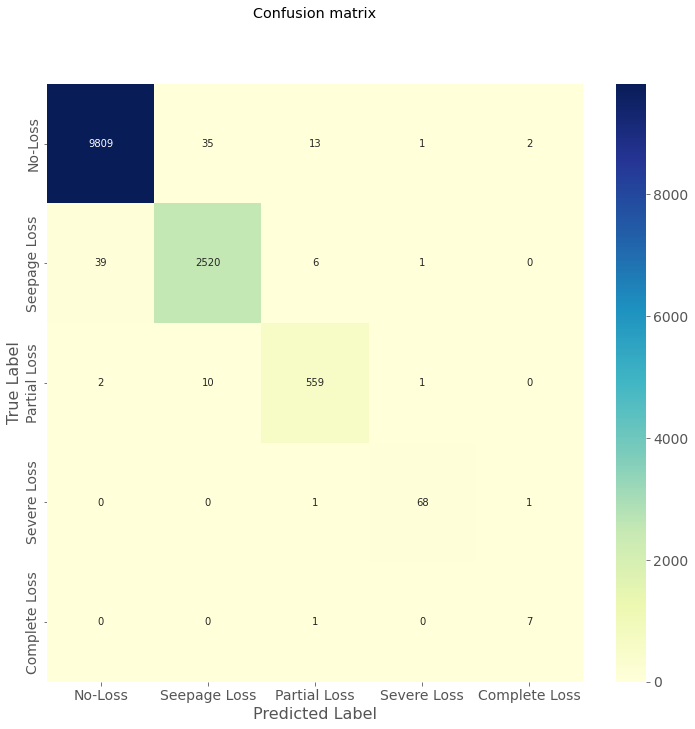

In [170]:
evaluate_model(CART_pipeline, X_test, y_test, figsize =(12,11))

### KNN

In [66]:
# # Build pipeline
# clf = KNeighborsClassifier()
# pipeline = build_pipeline(clf)
# pipeline.get_params()

{'memory': None,
 'steps': [('StandardScaler', MinMaxScaler(feature_range=(1, 2))),
  ('BoxScaler', PowerTransformer(method='box-cox')),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'StandardScaler': MinMaxScaler(feature_range=(1, 2)),
 'BoxScaler': PowerTransformer(method='box-cox'),
 'model': KNeighborsClassifier(),
 'StandardScaler__clip': False,
 'StandardScaler__copy': True,
 'StandardScaler__feature_range': (1, 2),
 'BoxScaler__copy': True,
 'BoxScaler__method': 'box-cox',
 'BoxScaler__standardize': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [67]:
# # specify parameters for grid search
# parameters = {
#     'model__n_neighbors': randint(3,11),
#     # 'model__weights': ['uniform', 'distance'],
#     # 'metric': ['euclidean', 'manhattan']
# }

# # conduct gridsearch and create model
# model_KNN = parameter_search(pipeline, parameters)
# #  Export model as a pickle file
# save_model( model_KNN, 'KNN_classifier.pkl')

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [ ]:
# #  Import model as a pickle file
# model_KNN = load_model("KNN_classifier.pkl")

In [ ]:
# model_KNN.best_score_

0.9877182919056723

#### Evaluate model

##### Confusion matrix

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       0.64      0.88      0.74         8
      No-Loss       0.99      1.00      1.00      9860
 Partial Loss       0.92      0.98      0.95       572
 Seepage Loss       0.99      0.96      0.98      2566
  Severe Loss       0.95      0.83      0.89        70

     accuracy                           0.99     13076
    macro avg       0.90      0.93      0.91     13076
 weighted avg       0.99      0.99      0.99     13076




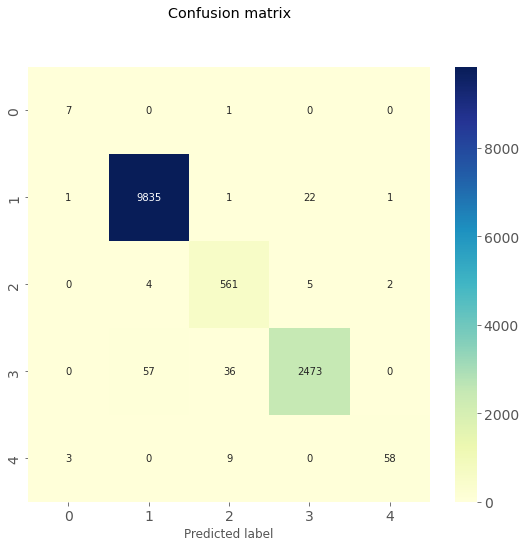

In [ ]:
# evaluate_model(model_KNN, X_test, y_test, figsize =(9,8))

##### ROC curve

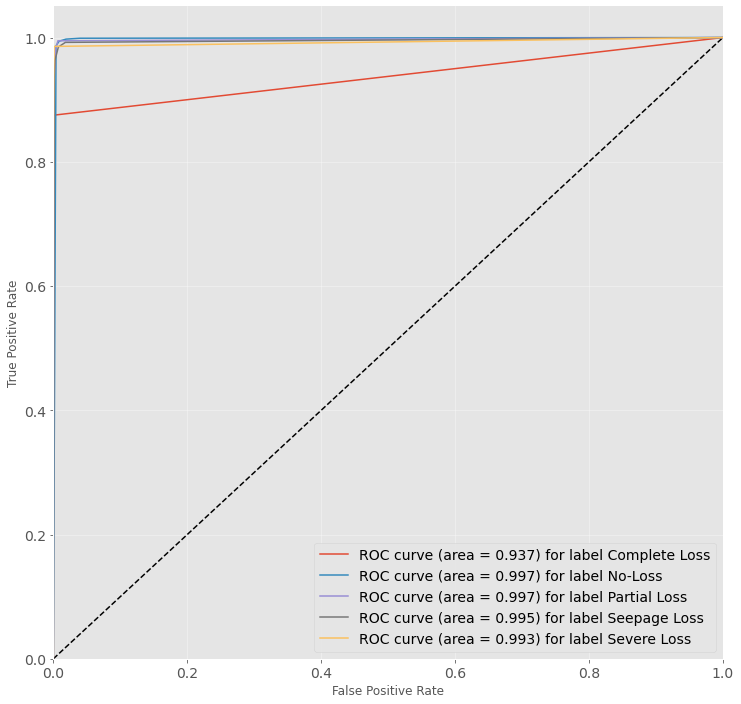

In [ ]:
# plot_multiclass_roc(model_KNN, X_test, y_test, n_classes=5, figsize=(12, 12))

### CART

#### Build pipeline

In [123]:

clf = DecisionTreeClassifier(random_state=42)
pipeline = build_pipeline(clf)
pipeline.get_params()

{'memory': None,
 'steps': [('StandardScaler', MinMaxScaler(feature_range=(1, 2))),
  ('BoxScaler', PowerTransformer(method='box-cox')),
  ('model', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'StandardScaler': MinMaxScaler(feature_range=(1, 2)),
 'BoxScaler': PowerTransformer(method='box-cox'),
 'model': DecisionTreeClassifier(random_state=42),
 'StandardScaler__clip': False,
 'StandardScaler__copy': True,
 'StandardScaler__feature_range': (1, 2),
 'BoxScaler__copy': True,
 'BoxScaler__method': 'box-cox',
 'BoxScaler__standardize': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': 42,
 'model__splitter': 'best'}

#### Train model

In [142]:
# specify parameters for grid search

parameters = {
    # 'model__min_samples_leaf': randint(2,100),
    'model__max_depth': randint(2,100), 
    # 'model__min_samples_split': randint(2,100), 
    # 'model__max_features': randint(2,100),
    # 'model__criterion': # ['gini', 'entropy']
    
}

# conduct gridsearch and create model
model_CART = parameter_search(pipeline, parameters)



Fitting 30 folds for each of 10 candidates, totalling 300 fits

Best Parameters: {'model__max_depth': 53}


In [143]:
#  Export model as a pickle file
save_model(model_CART, 'CART_classifier.pkl')

In [144]:
#  Import model as a pickle file
model_CART = load_model("CART_classifier.pkl")

In [145]:
model_CART.best_score_

0.9904401162710649

In [146]:
model_CART.best_params_

{'model__max_depth': 53}

#### Evaluate model

##### Confusion matrix

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       1.00      1.00      1.00        26
      No-Loss       1.00      1.00      1.00     39685
 Partial Loss       1.00      1.00      1.00      2075
 Seepage Loss       1.00      1.00      1.00     10314
  Severe Loss       1.00      1.00      1.00       200

     accuracy                           1.00     52300
    macro avg       1.00      1.00      1.00     52300
 weighted avg       1.00      1.00      1.00     52300




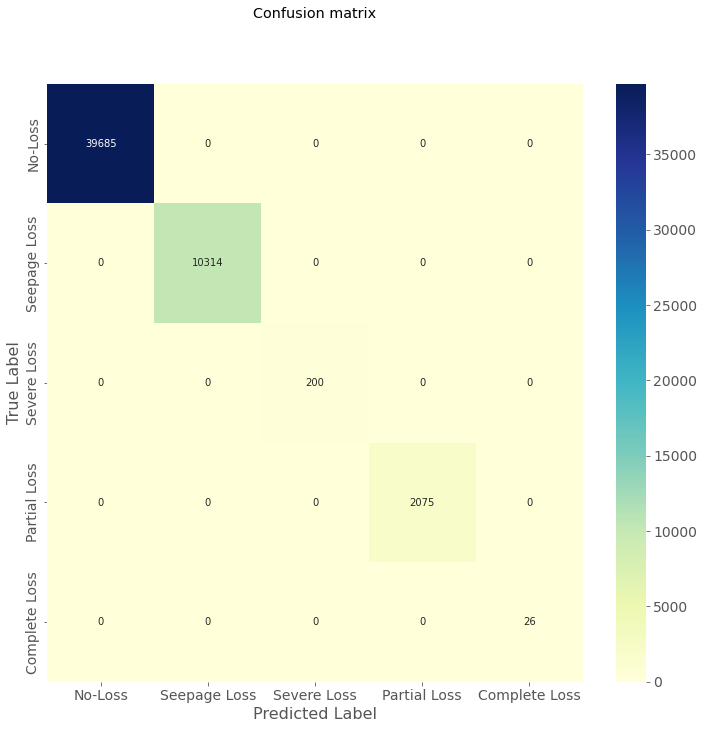

In [147]:
evaluate_model(model_CART, X_train, y_train, figsize =(12,11))

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       0.70      0.88      0.78         8
      No-Loss       1.00      0.99      1.00      9860
 Partial Loss       0.96      0.98      0.97       572
 Seepage Loss       0.98      0.98      0.98      2566
  Severe Loss       0.96      0.97      0.96        70

     accuracy                           0.99     13076
    macro avg       0.92      0.96      0.94     13076
 weighted avg       0.99      0.99      0.99     13076




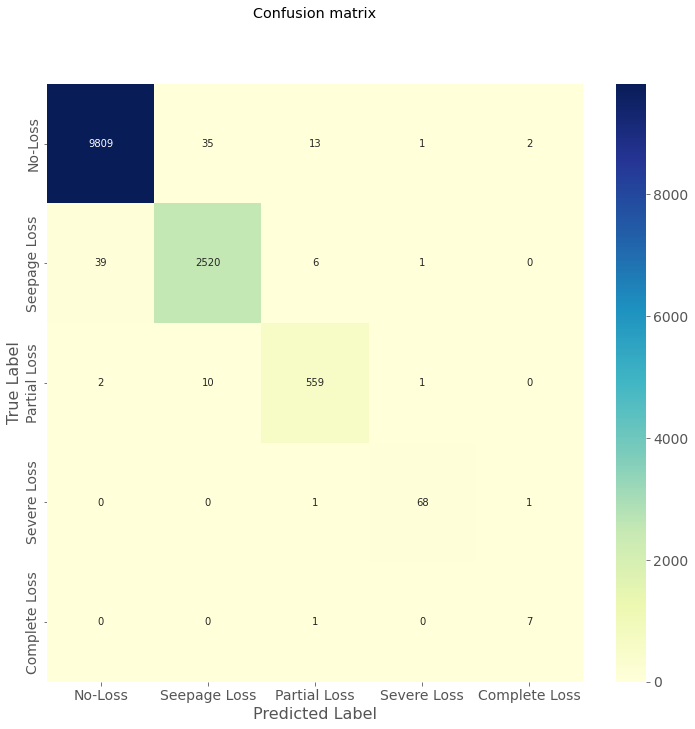

In [148]:
evaluate_model(model_CART, X_test, y_test, figsize =(12,11))

##### ROC curve

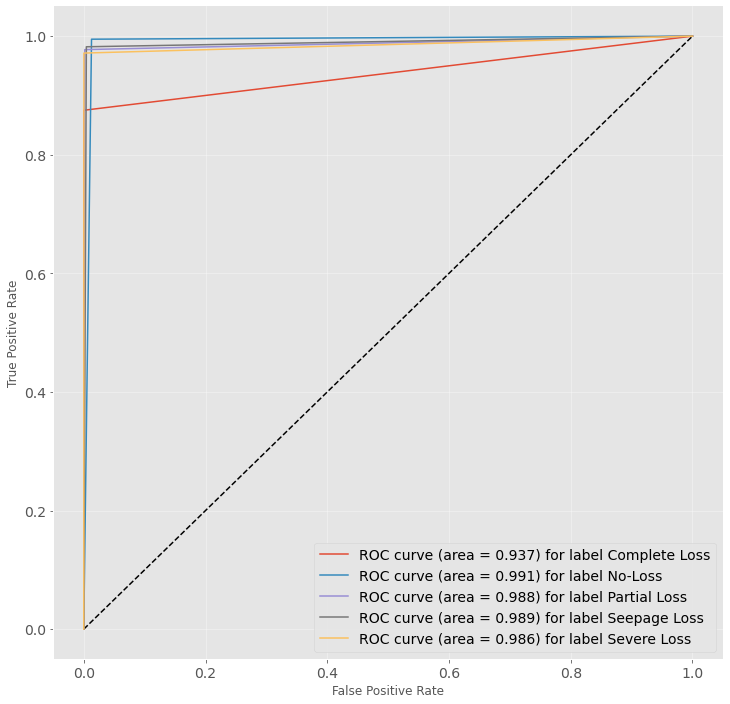

In [149]:
plot_multiclass_roc(model_CART, X_test, y_test, n_classes=5, figsize=(12, 12))

### Ensembles

In [121]:
Cart_model = DecisionTreeClassifier(max_depth=54, min_samples_leaf=3, random_state=42)

pipelines = []
pipelines.append(('ABC', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')),('ABC', AdaBoostClassifier(base_estimator= Cart_model, random_state= 42))]))) 
pipelines.append(('GBC', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('GBC', GradientBoostingClassifier(random_state= 42))])))
pipelines.append(('RFC', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('RFC', RandomForestClassifier(random_state= 42))])))
# pipelines.append(('ET', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('ET', ExtraTreesClassifier(random_state= 42))])))
pipelines.append(('BC', Pipeline([('StandardScaler', MinMaxScaler(feature_range=(1, 2))), ('BoxScaler', PowerTransformer(method='box-cox')), ('BC', BaggingClassifier(base_estimator= Cart_model, random_state= 42))]))) 


results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train.to_numpy().ravel(), cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ABC: 0.995685 (0.000798)
GBC: 0.934414 (0.003381)
RFC: 0.996525 (0.000782)
BC: 0.993316 (0.001182)


In [ ]:
# ABC: 0.714449 (0.055909)
# GBC: 0.923499 (0.167832)
# RFC: 0.997597 (0.000671)
# ET: 0.997591 (0.000641)

# ABC: 0.997350 (0.000575)
# GBC: 0.921509 (0.170686)
# RFC: 0.997659 (0.000639)
# ET: 0.997562 (0.000623)
# GBC: 0.995280 (0.000903)


# ABC: 0.9956848707562059 0.0007975145563310571
# GBC: 0.9344139955875869 0.0033811253678894568
# RFC: 0.996525278993038 0.0007815669342498627
# BC:0.993316015446118 0.00118228289280889

In [130]:
for i in range(len(results)):
    print(results[i].mean(), results[i].std())

0.9956848707562059 0.0007975145563310571
0.9344139955875869 0.0033811253678894568
0.996525278993038 0.0007815669342498627
0.993316015446118 0.00118228289280889


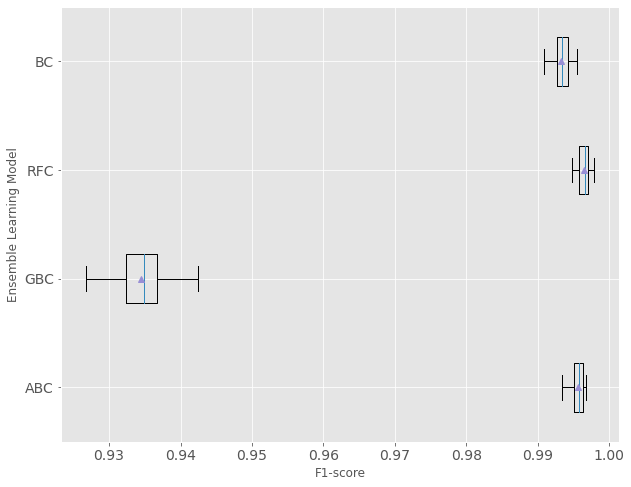

In [122]:
# # Compare Algorithms

fig = plt.figure(figsize=(10,8))
# fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert= False, showmeans=True)
ax.set_yticklabels(names)
ax.set_xlabel('F1-score')
ax.set_ylabel('Ensemble Learning Model')

plt.show()

### RF

In [154]:
# Build pipeline
clf = RandomForestClassifier()
pipeline = build_pipeline(clf)
pipeline.get_params()

{'memory': None,
 'steps': [('StandardScaler', MinMaxScaler(feature_range=(1, 2))),
  ('BoxScaler', PowerTransformer(method='box-cox')),
  ('model', RandomForestClassifier())],
 'verbose': False,
 'StandardScaler': MinMaxScaler(feature_range=(1, 2)),
 'BoxScaler': PowerTransformer(method='box-cox'),
 'model': RandomForestClassifier(),
 'StandardScaler__clip': False,
 'StandardScaler__copy': True,
 'StandardScaler__feature_range': (1, 2),
 'BoxScaler__copy': True,
 'BoxScaler__method': 'box-cox',
 'BoxScaler__standardize': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__ra

In [155]:
# specify parameters for grid search
parameters = {
    'model__n_estimators': randint(50,500),
    'model__max_depth': randint(3,20),
    # 'model__bootstrap': [True, False]
    # 'model__min_samples_leaf': randint(2,100),

}

# conduct gridsearch and create model
model_RF = parameter_search(pipeline, parameters)

Fitting 30 folds for each of 10 candidates, totalling 300 fits

Best Parameters: {'model__max_depth': 17, 'model__n_estimators': 156}


In [156]:
#  Export model as a pickle file
save_model( model_RF, 'RF_classifier.pkl')

In [44]:
#  Import model as a pickle file
model_RF = load_model("RF_classifier.pkl")

#### Evaluate model

In [158]:
model_RF.best_params_

{'model__max_depth': 17, 'model__n_estimators': 156}

##### Confusion matrix

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       1.00      0.96      0.98        26
      No-Loss       1.00      1.00      1.00     39685
 Partial Loss       1.00      1.00      1.00      2075
 Seepage Loss       1.00      1.00      1.00     10314
  Severe Loss       1.00      0.99      1.00       200

     accuracy                           1.00     52300
    macro avg       1.00      0.99      1.00     52300
 weighted avg       1.00      1.00      1.00     52300




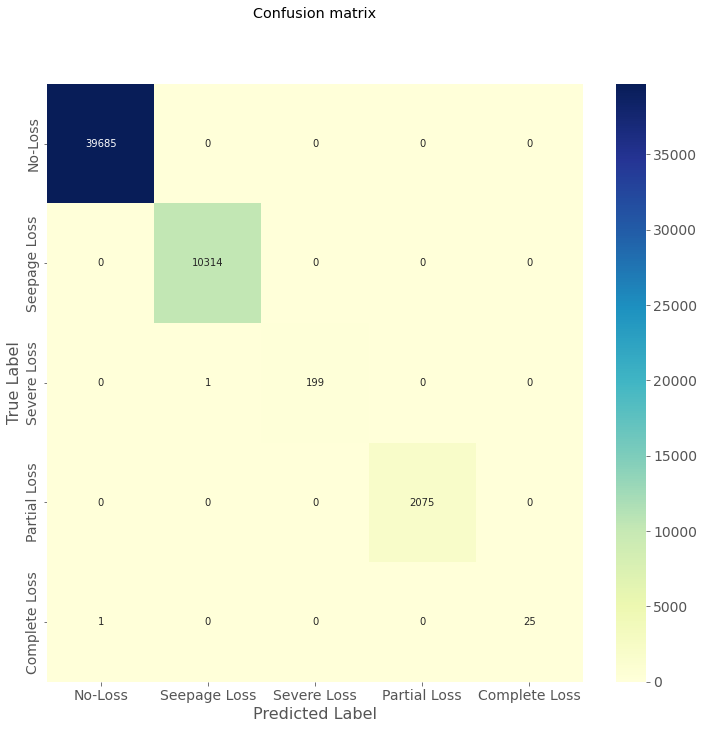

In [159]:
evaluate_model(model_RF, X_train, y_train, figsize =(12,11))

Classification report for predicting:
               precision    recall  f1-score   support

Complete Loss       0.78      0.88      0.82         8
      No-Loss       1.00      1.00      1.00      9860
 Partial Loss       0.99      0.99      0.99       572
 Seepage Loss       1.00      0.99      1.00      2566
  Severe Loss       1.00      0.97      0.99        70

     accuracy                           1.00     13076
    macro avg       0.95      0.97      0.96     13076
 weighted avg       1.00      1.00      1.00     13076




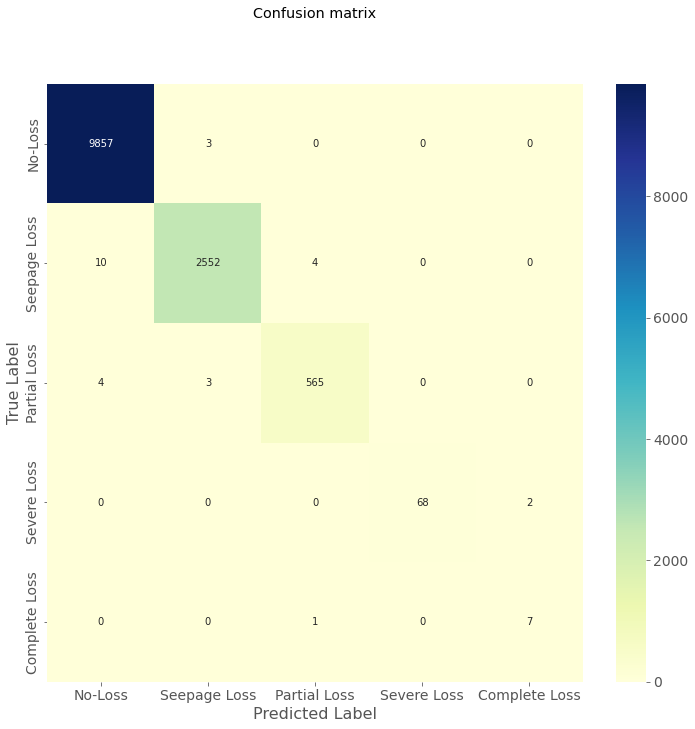

In [171]:
evaluate_model(model_RF, X_test, y_test, figsize =(12,11))

##### ROC curve

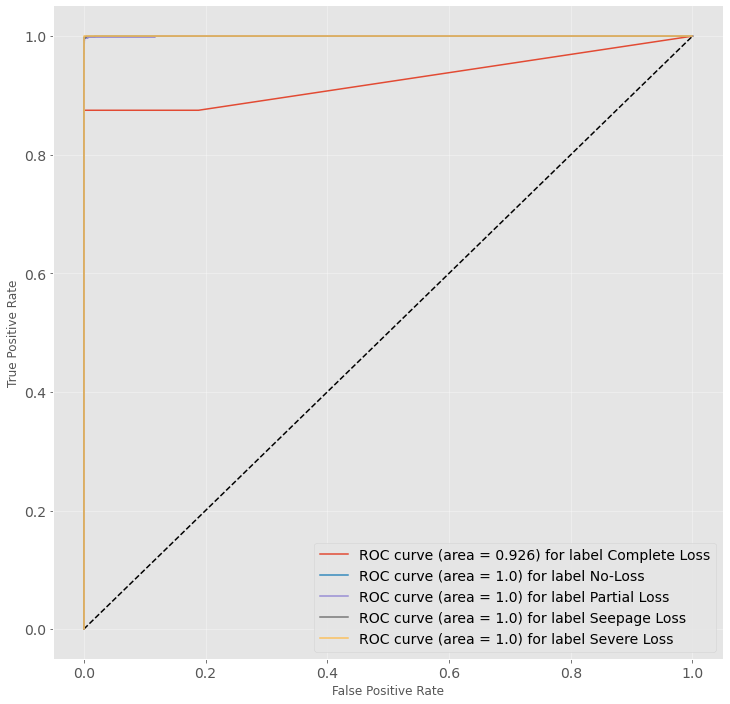

In [161]:
plot_multiclass_roc(model_RF, X_test, y_test, n_classes=5, figsize=(12, 12))

### Feature importance

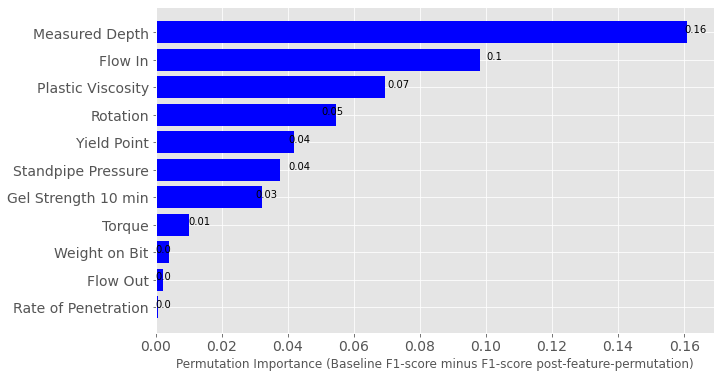

In [45]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model_RF, X_train, y_train,
                                 scoring=scoring, 
                                 n_repeats=10, n_jobs=-1, random_state=42)
# get importance
feature_importance = results.importances_mean

X_train.rename(columns = {'M.Depth': 'Measured Depth',
                          'RateofPenetration': 'Rate of Penetration',
                          'WeightonBit':'Weight on Bit',
                          'StandpipePressure': 'Standpipe Pressure',
                          'FlowIn': 'Flow In',
                          'FlowOut': 'Flow Out',
                          'PlasticViscosity': 'Plastic Viscosity',
                          'YieldPoint': 'Yield Point',
                          'Gel Strength10min' : 'Gel Strength 10 min',

}, inplace= True)

sorted_feat= sorted(zip(feature_importance, X_train), reverse=False)

# Create two lists from the list of tuples created
value,name = [list(c) for c in zip(*sorted_feat)]

# Plot the features
f = plt.figure(figsize=(10,6))
plt.barh(y = name, width= value, color= 'b')

for index, value in enumerate(value):
  value = round(value,2)
  plt.text(value, index, str(value))

plt.xlabel('Permutation Importance (Baseline F1-score minus F1-score post-feature-permutation)')
# plt.ylabel(' Features ')
plt.show()